#MODELO DE CLASIFICACION - KEVIN VALLE

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno#Graficar para  valores nulos
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13240 non-null  object 
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13167.0,2.691501,1.343284,1.0,2.0,2.0,3.0,40.0
balcony,12635.0,1.583854,0.817913,0.0,1.0,2.0,2.0,3.0
price,13240.0,112.493455,149.206816,8.0,50.0,72.0,120.0,3600.0


In [61]:
df['total_sqft']= pd.to_numeric(df['total_sqft'],errors='coerce')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    12993 non-null  float64
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [63]:
le = LabelEncoder()

In [64]:
size = df['size'].str.split(expand=True)
size.columns = ['val_size','val_cat']
df = pd.concat([df, size], axis=1)
df['val_cat'] = le.fit_transform(df['val_cat'])
df = df.drop('size',axis=1)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    12993 non-null  float64
 5   bath          13167 non-null  float64
 6   balcony       12635 non-null  float64
 7   price         13240 non-null  float64
 8   val_size      13224 non-null  object 
 9   val_cat       13320 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ MB


In [66]:
df.loc[df.price<=50,'Price']='bajo'
df.loc[df.price>=120,'Price']='alto'
df['Price'] = le.fit_transform(df['Price'])
df = df.drop('price', axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    12993 non-null  float64
 5   bath          13167 non-null  float64
 6   balcony       12635 non-null  float64
 7   val_size      13224 non-null  object 
 8   val_cat       13320 non-null  int64  
 9   Price         13320 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.0+ MB


In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sqft,12993.0,1553.174567,1238.257234,1.0,1100.0,1274.0,1665.0,52272.0
bath,13167.0,2.691501,1.343284,1.0,2.0,2.0,3.0,40.0
balcony,12635.0,1.583854,0.817913,0.0,1.0,2.0,2.0,3.0
val_cat,13320.0,0.211787,0.460591,0.0,0.0,0.0,0.0,3.0
Price,13320.0,1.226051,0.828230,0.0,0.0,1.0,2.0,2.0


In [69]:
df


,area_type,availability,location,society,total_sqft,bath,balcony,val_size,val_cat,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,2,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,4,1,0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,3,0,2
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,3,0,2
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,5,1,0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,5.0,NaN,4,0,0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,2,0,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689.0,4.0,1.0,4,0,0


In [70]:
df['area_type']=le.fit_transform(df['area_type'])
df['society']=le.fit_transform(df['society'])
df = df.drop('availability',axis=1)
df = df.drop('location',axis=1)

In [71]:
df = df.fillna(df.mean())

<ipython-input-71-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [72]:
df.isnull().sum()

area_type      0
society        0
total_sqft     0
bath           0
balcony        0
val_size      96
val_cat        0
Price          0
dtype: int64

In [73]:
df['val_size']= pd.to_numeric(df['val_size'],errors='coerce')

In [74]:
df = df.fillna(df.mean())

In [75]:
df.isnull().sum()

area_type     0
society       0
total_sqft    0
bath          0
balcony       0
val_size      0
val_cat       0
Price         0
dtype: int64

# BALANCEO Y ATIPICOS

In [76]:
df.Price.value_counts()

2    6414
1    3503
0    3403
Name: Price, dtype: int64

In [77]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [78]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)
y_smote.value_counts()

1    6414
0    6414
2    6414
Name: Price, dtype: int64

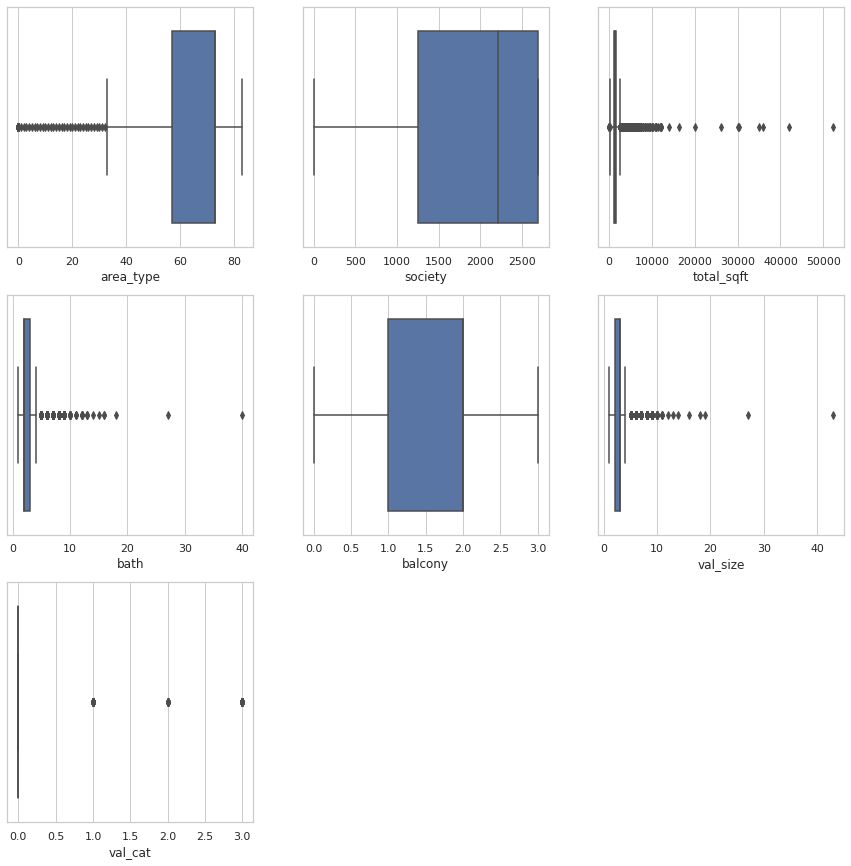

In [79]:
plt.figure(figsize=(15,15))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [86]:
for i in c:
  q1 = df[i].quantile(0.09)#valor
  q4 = df[i].quantile(0.91)#valor
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-86-c4c67da0c149>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-86-c4c67da0c149>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4


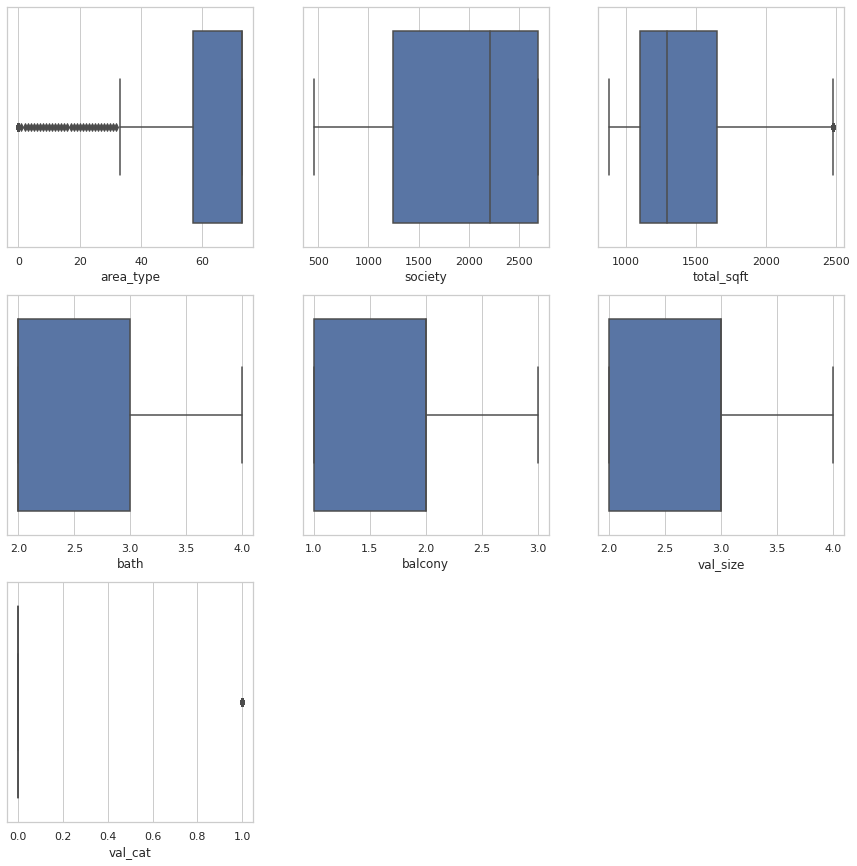

In [87]:
plt.figure(figsize=(15,15))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [88]:
scaler = MinMaxScaler()
scaler.fit(X_smote)
X_smote = scaler.transform(X_smote)

#ENTRENAMIENTO

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,random_state=500,test_size=0.2)

In [90]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [91]:
ann = Sequential()
ann.add(Dense(6,activation='relu'))
ann.add(Dense(3,activation='relu'))
ann.add(Dense(3,activation='sigmoid'))
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ann.fit(x=X_train, y=y_train, validation_data = (X_test,y_test),batch_size=500,epochs=200,verbose=1)

Epoch 1/200
31/31 [==============================] - 0s 5ms/step - loss: 1.0925 - accuracy: 0.3385 - val_loss: 1.0887 - val_accuracy: 0.3588
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.3499 - val_loss: 1.0808 - val_accuracy: 0.3365
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0764 - accuracy: 0.3622 - val_loss: 1.0718 - val_accuracy: 0.4175
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.4281 - val_loss: 1.0610 - val_accuracy: 0.4318
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0551 - accuracy: 0.4341 - val_loss: 1.0463 - val_accuracy: 0.4417
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0405 - accuracy: 0.4742 - val_loss: 1.0308 - val_accuracy: 0.4926
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0259 - accuracy: 0.4943 - val_loss: 1.0150 - val_accuracy: 0.5017
Epoch 8/200
3

In [92]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

121/121 [==============================] - 0s 779us/step


In [93]:
for i in range(len(y_pred_test)):
  index = list(y_pred_test[i]).index(max(y_pred_test[i]))
  for j in range(len(y_pred_test[i])):
    y_pred_test[i][j]=0
  y_pred_test[i][index]=1

for i in range(len(y_pred_train)):
  index = list(y_pred_train[i]).index(max(y_pred_train[i]))
  for j in range(len(y_pred_train[i])):
    y_pred_train[i][j]=0
  y_pred_train[i][index]=1

In [94]:
y_pred_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [95]:
y_train

,0,1,2
639,1,0,0
14430,1,0,0
12412,1,0,0
3791,0,0,1
16538,0,1,0
...,...,...,...
16968,0,1,0
3790,1,0,0
8465,1,0,0
12097,0,0,1


In [96]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5143
           1       0.71      0.85      0.77      5121
           2       0.64      0.52      0.58      5129

   micro avg       0.74      0.74      0.74     15393
   macro avg       0.73      0.74      0.73     15393
weighted avg       0.73      0.74      0.73     15393
 samples avg       0.74      0.74      0.74     15393



In [97]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1271
           1       0.72      0.86      0.79      1293
           2       0.64      0.52      0.57      1285

   micro avg       0.74      0.74      0.74      3849
   macro avg       0.73      0.74      0.73      3849
weighted avg       0.73      0.74      0.73      3849
 samples avg       0.74      0.74      0.74      3849



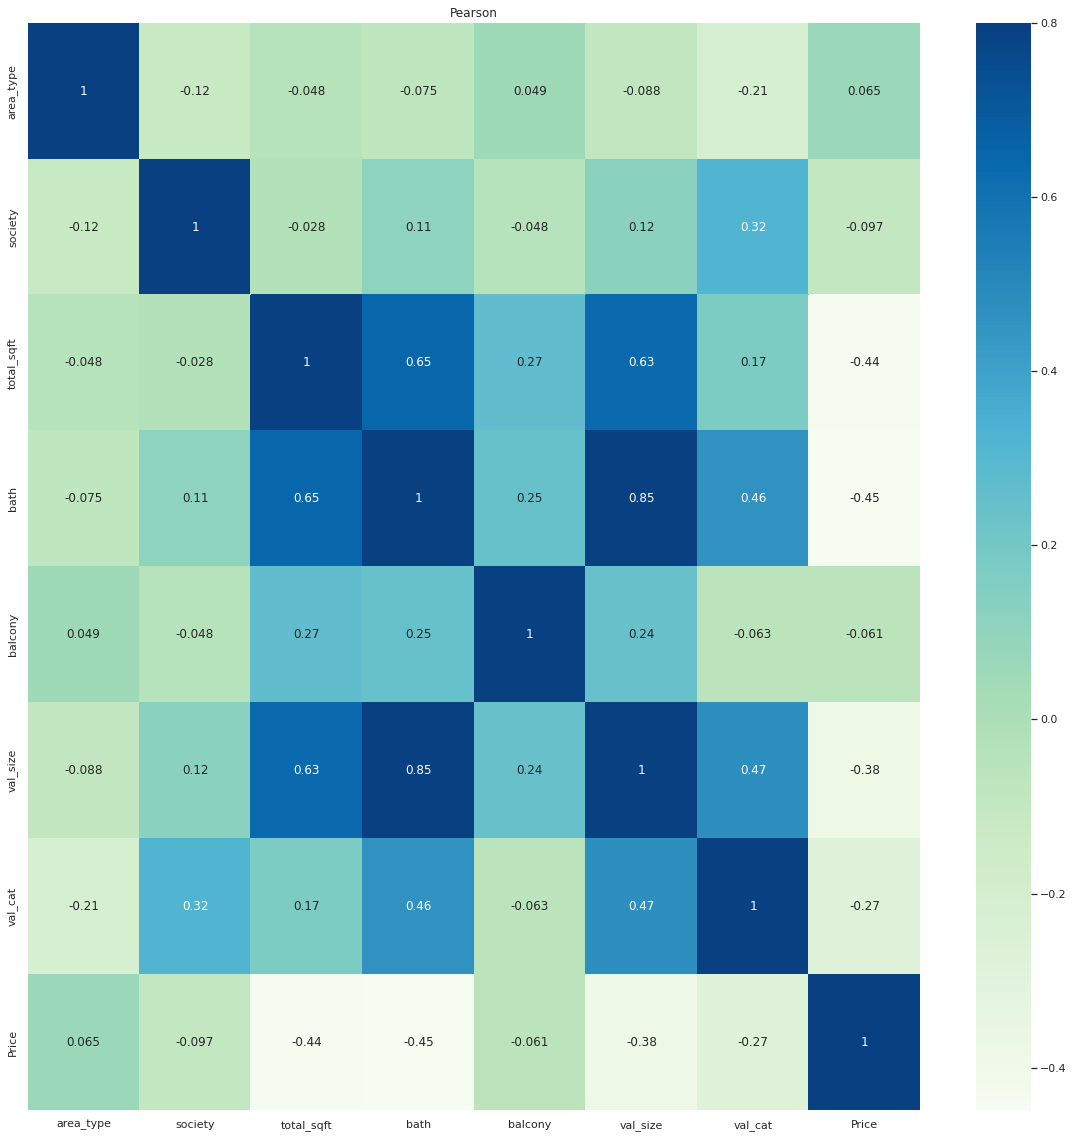

In [98]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(20,20))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.8,annot=True,cmap='GnBu')